# T-Test

__Ace Realty__ wants to determine whether the average time it takes to sell homes is different for its two offices.    
- A sample of 40 sales from office #1 revealed:
  - a mean of 90 days,
  - a standard deviation of 15 days.    
 ***
- A sample of 50 sales from office #2 revealed:
  - a mean of 100 days,
  - a standard deviation of 20 days.  
***
Use a .05 level of significance.

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy import stats
import pydataset


𝐻0, the null hypothesis: Mean time for sells in Ace Realty's First Office = Mean time for sells in their Second Office

𝐻𝑎, the alternative hypothesis: Mean time for sells in Ace Realty's First Office = Mean time for sells in their Second Office

In [26]:
# lets make some variables. 

null_hypothesis = 'Mean time for sells in Ace Realty\'s First Office = Mean time for sells in their Second Office'

confidence_level = 95
significance_level = alpha = .05
critical_value = critical_probability = 1 - (alpha / 2) # .975

n1, n2 = 40, 50 # number of members(sales) in the sample set
x̅_office_1, x̅_office_2 = 90, 100 # mean
s1, s2 = 15, 20 # standard deviation

# standard deviation is the square-root of variance. 
# Therefore to convert standard standard deviation to variance, square the standard deviation.
variance1, variance2 = 15**2, 20**2
# print(variance1, variance2)
# the variances are not equal. 
# if I were using stats.ttest_ind, I would be setting the argument of equal_var to False.

# the same also goes for stats.ttest_ind_from_stats, accorind to scipy docs. 
# two-sided is the default argument for the alternative hypothese, wherein the means are unequal. 


# so here the goal is to compare two observed means(independent samples), from this array-like
# sample set. So, as a parametric test, I will run an independent t-test:scipy.stats.ttest_ind
# we have a large enough set, in accordance with the Central Limit Theorem, to proceed
# without scaling via the Gaussian Scalar method. 


t, p = stats.ttest_ind_from_stats(x̅_office_1, s1, n1, x̅_office_2, s2, n2, equal_var=False)

one_tailed_p = p / 2
# print(one_tailed_p)
# print(f' Our p-value is less than alpha: {one_tailed_p < alpha}')
print(f'''
The one-tailed test demonstrates the p-value ({one_tailed_p:.02}) is lower than the alpha {alpha}, 
errgo the Null Hypothesis ({null_hypothesis}) is rejected.''')



The one-tailed test demonstrates the p-value (0.0041) is lower than the alpha 0.05, 
errgo the Null Hypothesis (Mean time for sells in Ace Realty's First Office = Mean time for sells in their Second Office) is rejected.


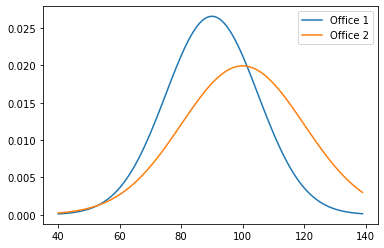

In [60]:
# x = np.arange(0,100) # 0, 100 cut it off too soon. Irrelevant until around 40. 
x = np.arange(40,140)

y1 = stats.norm(x̅_office_1, s1).pdf(x)
y2 = stats.norm(x̅_office_2, s2).pdf(x)


plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')

plt.legend()

 #### notes taken as comments while I was solving this, moved into markdown 
 The p-value is the chance that we obtained the results we did
 (or would obtain more extreme results) due to chance if the null hypothesis is true.
 The tail refers to the end of the distribution of the test statistic for the particular
 analysis that you are conducting. For example, a t-test uses the t distribution, and an analysis
 of variance (ANOVA) uses the F distribution. The distribution of the test statistic can have one
 or two tails depending on its shape. The black-shaded areas of the distributions in the figure
 are the tails. Symmetrical distributions like the t and z distributions have two tails. 

 Two tailed tests are appropriate to determine if there is any difference between the groups
 being compared. A two tailed test uses both the postive and negative tails of the distribution.
 however, here, if we are looking at sales relative to time, there shouldn't be negative values. 

 "When in doubt, it is almost always more appropriate to use a two-tailed test.
 A one-tailed test is only justified if you have a specific prediction about the direction
 of the difference (e.g., Group A scoring higher than Group B), and you are completely 
 uninterested in the possibility that the opposite outcome could be true (e.g., Group A
 scoring lower than Group B)."

 If the p-value is higher than your alpha, I fail to reject the Null Hypothesis.
 If the p-value is lower than the alpha, I reject the Null Hypothesis.

 comments galore: there are two main approaches for making the conclusion of a hypothesis test. 
 the critical value approach compares the test statistic with the critical value of the significance level
    the p value approach compares the p-value of the test statistics with the significance level. 
 critical value (p*) = 1 - alpha/2 
You can express the critical value in two ways: as a Z-score related to cumulative probability
 and as a critical t statistic, which is equal to the critical probability. useful when the standard deviation is unknown. 

 as I get deeper into this, I am seeing the prospects of using t or z tests excessive and ridiculous. 
 I still don't understand when to use the one_tail versus two_tail. But for now, I will just use the former. 
 print(t)
 print(p)
 
 The H 0 null hypothesis is always framed as:
There's no significant difference between continuous variables of 2 subgroups (two-tailed t-test) There's no significant difference between the continuous variaable of a subgroup and its population (one tailed t-test) There's no linear relationship between two continuous variables (correlation) There's no dependence between two categorical variables (chi-squared)

#### scipy.stats.ttest_ind_from_stats
scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')[source]       
 
T-test for means of two independent samples from descriptive statistics.       

This is a test for the null hypothesis that two independent samples have identical average (expected) values.

# MPG DATASET

Load the __mpg dataset__ and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?    
***
- Are compact cars more fuel-efficient than the average car?
***
- Do manual cars get better gas mileage than automatic cars?

In [3]:
mpg = pydataset.data('mpg')


### _Is there a difference in fuel-efficiency in cars from 2008 vs 1999?_

In [4]:
# harmonic mean. 
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()
# separate the independent groups:
 # mpg data set where the year is 2008, specifying the average fuel efficiency column 
fe_2008 = mpg[mpg.year == 2008].avg_fe

# same, but with the 1999 year. 
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [9]:
fe_2008.var(), fe_1999.var()
fe_2008.count(), fe_1999.count()

(117, 117)

In [11]:
# stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_2008, fe_1999)

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

# p is significantly greater than alpha, so we have not rejected the null hypothesis. 

(-0.3011962975077886, 0.7635345888327115)

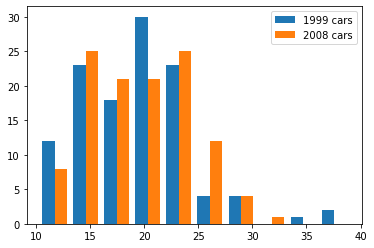

In [12]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### _Are compact cars more fuel-efficient than the average car?_

H0: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency 
Ha: Compact cars are more fuel efficient than the average car 
for ha to be true t >0 and p/2 > 0.05


In [35]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
mu = fe_compact.mean()

t, p = stats.ttest_1samp(fe_compact, mu)
print('t=', t)
print('p=', p/2)

print(f'''
Since p ({p:.5f}) > alpha (.05), we accept the null hypothesis.''')

t= 6.817370168225931e-15
p= 0.49999999999999734

Since p (1.00000) > alpha (.05), we accept the null hypothesis.


### _Do manual cars get better gas milage than automatic cars?_

In [19]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [20]:
fe_auto.var(), fe_manual.var()


(20.428279095002054, 25.665633639828275)

In [22]:
stats.levene(fe_auto, fe_manual)
# high P value, can't assert a difference in variance. 

#parameter review: 
# roughly normal (sample size, CLT), equal varainces via levene tests, independent sample

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [27]:
t, p = stats.ttest_ind(fe_auto, fe_manual)
print('t=', t, 'p=', p/2, alpha)

t= -4.652577547151351 p= 2.7552323050220026e-06 0.05


In [28]:
print(f'''
Since p ({p:.5f}) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.
''')


Since p (0.00001) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.

